In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from google.colab import files
#uploaded = files.upload()


In [3]:
# reading the csv file
dataset = pd.read_csv('MetObjects.csv', sep=',', parse_dates=['Metadata Date'])


C:\Users\mcand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473770, 44)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473770 entries, 0 to 473769
Data columns (total 44 columns):
Object Number              473770 non-null object
Is Highlight               473770 non-null bool
Is Public Domain           473770 non-null bool
Object ID                  473770 non-null int64
Department                 473770 non-null object
Object Name                471861 non-null object
Title                      443804 non-null object
Culture                    206214 non-null object
Period                     88762 non-null object
Dynasty                    23134 non-null object
Reign                      11160 non-null object
Portfolio                  23036 non-null object
Artist Role                269705 non-null object
Artist Prefix              88981 non-null object
Artist Display Name        271799 non-null object
Artist Display Bio         232468 non-null object
Artist Suffix              11968 non-null object
Artist Alpha Sort          271765 no

### Initial Dropping of Columns
With a dataset of 473_427 entries, we dropped all empty columns and all columns with less than 100_000 entries.

In [5]:
#generating the list of bools to on columns to be dropped : True means drop, False means keep
dropping_bool = [value.count() < 100_000 for key, value in dataset.items()]

#zipping the column names against their bools
dropping_zip = zip(dataset.columns,dropping_bool)

#generating the list of columns to be dropped
dropping_cols = []
for a in dropping_zip:
    if a[1] == True:
        dropping_cols.append(a[0])

dropping_cols

['Period',
 'Dynasty',
 'Reign',
 'Portfolio',
 'Artist Prefix',
 'Artist Suffix',
 'Geography Type',
 'City',
 'State',
 'County',
 'Country',
 'Region',
 'Subregion',
 'Locale',
 'Locus',
 'Excavation',
 'River',
 'Rights and Reproduction']

In [6]:
dataset = dataset.drop(dropping_cols, axis=1)

In [9]:
#new info
print(dataset.shape)
print("")
dataset.info(null_counts=True)

(473770, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473770 entries, 0 to 473769
Data columns (total 26 columns):
Object Number          473770 non-null object
Is Highlight           473770 non-null bool
Is Public Domain       473770 non-null bool
Object ID              473770 non-null int64
Department             473770 non-null object
Object Name            471861 non-null object
Title                  443804 non-null object
Culture                206214 non-null object
Artist Role            269705 non-null object
Artist Display Name    271799 non-null object
Artist Display Bio     232468 non-null object
Artist Alpha Sort      271765 non-null object
Artist Nationality     182497 non-null object
Artist Begin Date      235074 non-null object
Artist End Date        232791 non-null object
Object Date            458846 non-null object
Object Begin Date      473770 non-null int64
Object End Date        473770 non-null int64
Medium                 466597 non-null object
Dimensio

In [10]:
dataset.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Display Name,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,The American Wing,Coin,One-dollar Liberty Head Coin,NaN,Maker,James Barton Longacre,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,NaT,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,The American Wing,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,Christian Gobrecht,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,NaT,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,NaT,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,NaT,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,The American Wing,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,NaT,"Metropolitan Museum of Art, New York, NY",NaN


In [11]:
#checking for duplicates
dataset = dataset.drop_duplicates()


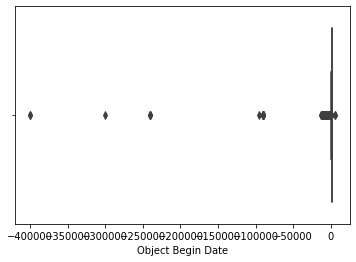

In [12]:

#checking for some outliers
sns.boxplot(x=dataset['Object Begin Date'])
dataset= dataset[dataset['Object Begin Date']>1500]





(360316, 26)

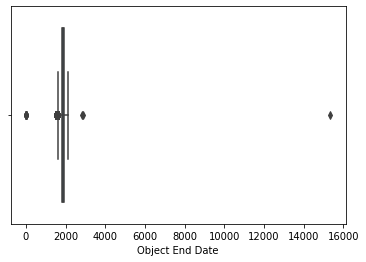

In [13]:
sns.boxplot(x=dataset['Object End Date'])  
dataset= dataset[dataset['Object End Date']>1500]
dataset.shape

In [ ]:
dataset.shape

# Visualizations


### *correlation matrix below to find any possible relation between the numerical data

In [42]:
correlations = dataset.corr()
correlations

,Is Highlight,Is Public Domain,Object ID,Object Begin Date,Object End Date
Is Highlight,1.000000,0.021347,0.002384,-0.002258,-0.010487
Is Public Domain,0.021347,1.000000,-0.267158,-0.444055,-0.417445
Object ID,0.002384,-0.267158,1.000000,0.133182,-0.000753
Object Begin Date,-0.002258,-0.444055,0.133182,1.000000,0.877008
Object End Date,-0.010487,-0.417445,-0.000753,0.877008,1.000000


Text(0.5, 1, 'Correlation Heatmap')

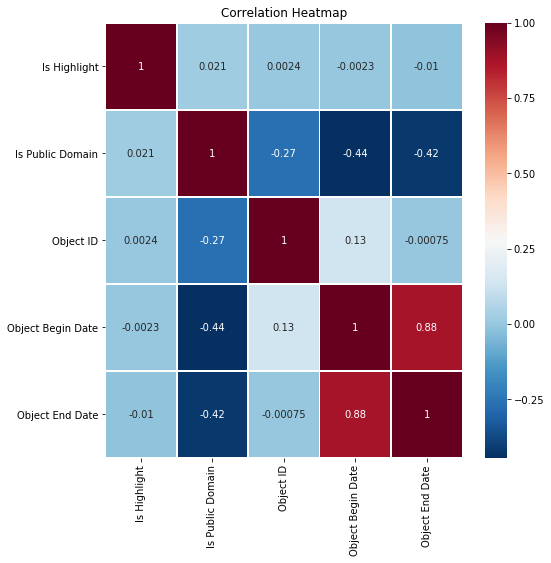

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(correlations , annot = True , cmap = 'RdBu_r' , linewidth = 0.7)
plt.title('Correlation Heatmap')

### *pulling some department counts and plotting a pie chart showing the distribution of the departments having more than 1000 artworks

In [35]:
departments = pd.DataFrame(dataset['Department'].value_counts())
departments.columns=['Count']
departments.sort_values(by="Count",ascending=False)
departments.head()

,Count
Drawings and Prints,162371
European Sculpture and Decorative Arts,39575
Photographs,36623
Costume Institute,31105
Asian Art,26498


C:\Users\mcand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


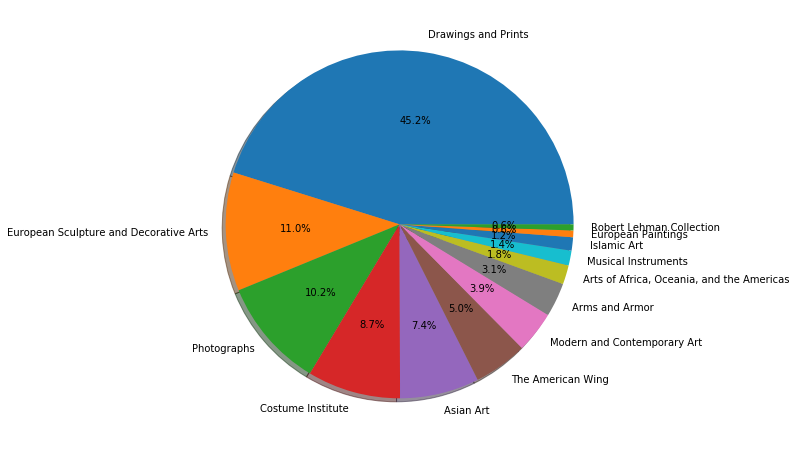

In [38]:
plt.figure(figsize=(8,8))
temp = departments[departments['Count']>=1000]
plt.pie(temp,labels=temp.index, autopct= '%.1f%%', shadow = True)
plt.show(block=False)


### *showing the different types of mediums vs the number of artworks made of that  medium

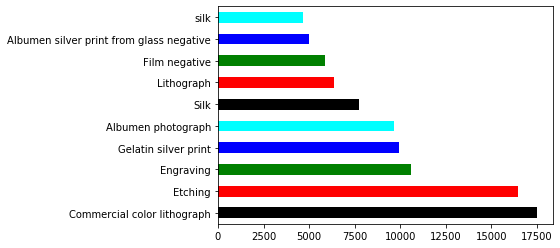

In [51]:
color=['black', 'red', 'green', 'blue', 'cyan']
dataset['Medium'].value_counts()[:10].plot(kind = 'barh', color=color)

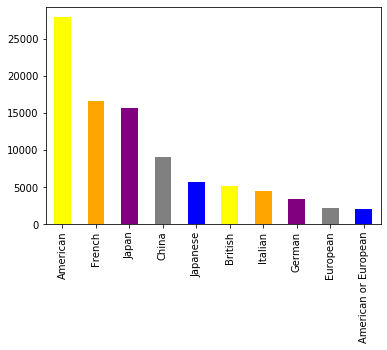

In [57]:
color=['yellow', 'orange', 'purple', 'grey', 'blue']
dataset['Culture'].value_counts()[:10].plot(kind = 'bar', color=color)